In [1]:
from sklearn.datasets import load_diabetes

In [2]:
dataset = load_diabetes()

In [3]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
import pandas as pd
df = pd.DataFrame(dataset.data,columns=['age','sex','bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])

In [5]:
## independent features
X = df
## dependent feature
y = dataset['target']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [7]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

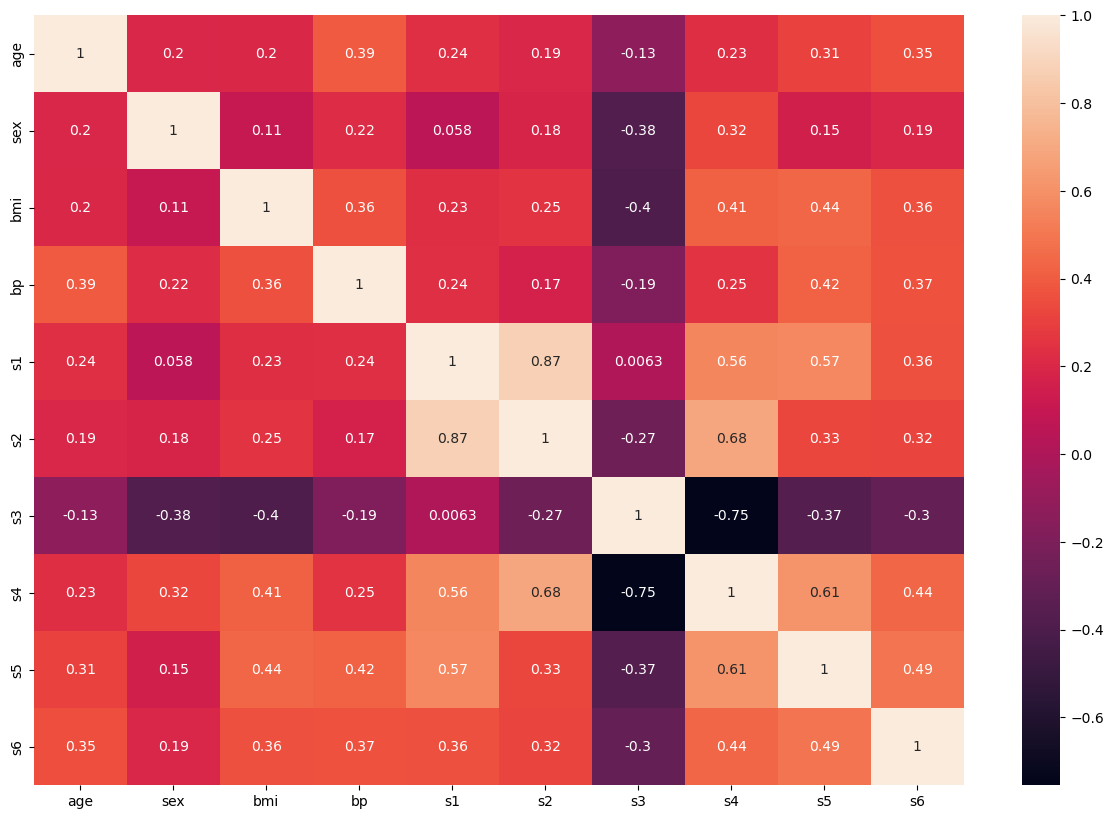

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [9]:
from sklearn.tree import DecisionTreeRegressor
rg = DecisionTreeRegressor()
rg.fit(X_train,y_train)

DecisionTreeRegressor()

In [10]:
y_pred = rg.predict(X_test)

In [11]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))

-0.23966786084390934
69.63157894736842
7738.93984962406


## Hyper Parameter Tuning

In [12]:
params = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['sqrt', 'log2', 'auto']
}

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
grid = GridSearchCV(DecisionTreeRegressor(),param_grid = params,cv=5,scoring="neg_mean_squared_error")

In [15]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [16]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [17]:
grid.best_score_

-3750.2829493716017

In [18]:
y_pred = grid.predict(X_test)

In [20]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.3786980213094302
50.244258340823976
3931.3945718457667


### visualize the tree

In [21]:
Selected_model = DecisionTreeRegressor(criterion= 'poisson',
 max_depth= 4,
 max_features= 'sqrt',
 splitter= 'best')

In [22]:
Selected_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=4, max_features='sqrt')

[Text(0.5431034482758621, 0.9, 'x[2] <= 0.005\npoisson = 18.919\nsamples = 309\nvalue = 152.738'),
 Text(0.27586206896551724, 0.7, 'x[8] <= 0.007\npoisson = 13.883\nsamples = 184\nvalue = 121.516'),
 Text(0.13793103448275862, 0.5, 'x[8] <= -0.043\npoisson = 10.174\nsamples = 130\nvalue = 103.323'),
 Text(0.06896551724137931, 0.3, 'x[1] <= 0.003\npoisson = 8.769\nsamples = 44\nvalue = 86.773'),
 Text(0.034482758620689655, 0.1, 'poisson = 10.467\nsamples = 29\nvalue = 93.793'),
 Text(0.10344827586206896, 0.1, 'poisson = 3.829\nsamples = 15\nvalue = 73.2'),
 Text(0.20689655172413793, 0.3, 'x[4] <= -0.052\npoisson = 9.837\nsamples = 86\nvalue = 111.791'),
 Text(0.1724137931034483, 0.1, 'poisson = 9.624\nsamples = 10\nvalue = 160.4'),
 Text(0.2413793103448276, 0.1, 'poisson = 8.454\nsamples = 76\nvalue = 105.395'),
 Text(0.41379310344827586, 0.5, 'x[2] <= -0.023\npoisson = 12.273\nsamples = 54\nvalue = 165.315'),
 Text(0.3448275862068966, 0.3, 'x[7] <= 0.031\npoisson = 10.449\nsamples = 17\

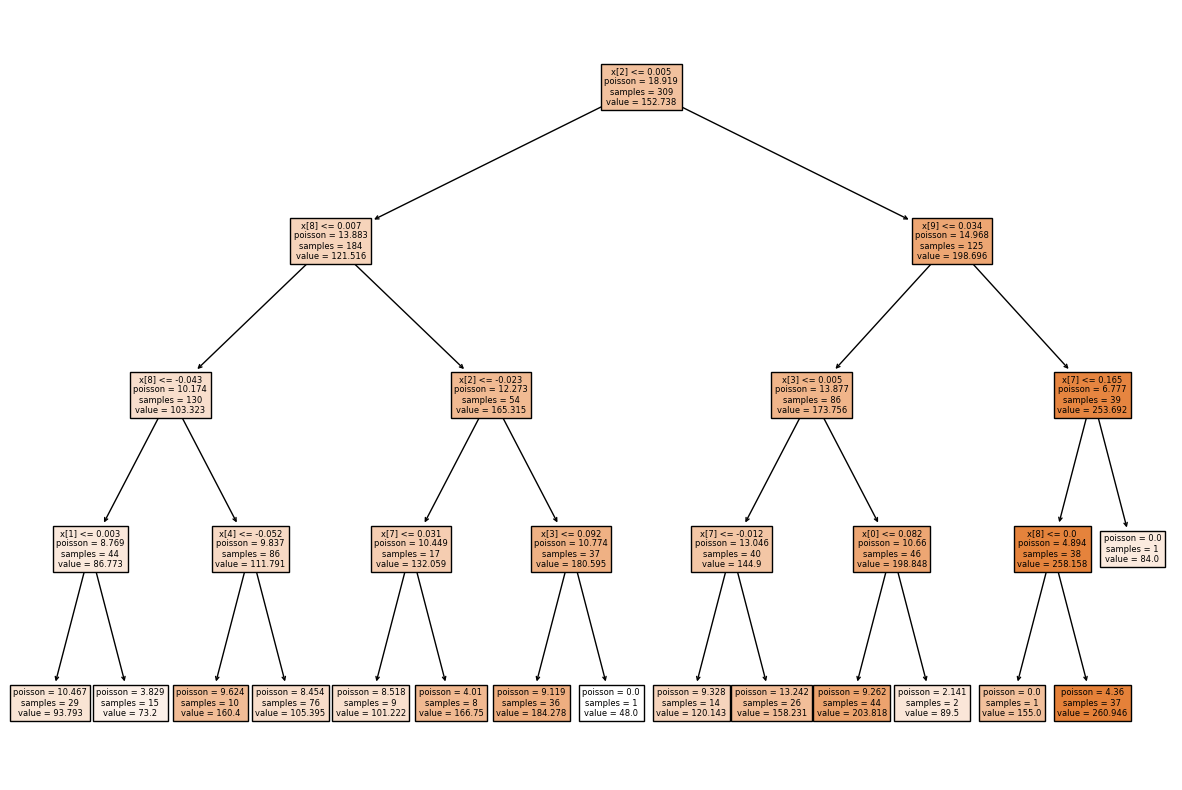

In [23]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(Selected_model,filled=True)